Importing necessary libraries

In [1]:
# data processing
import numpy as np 
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


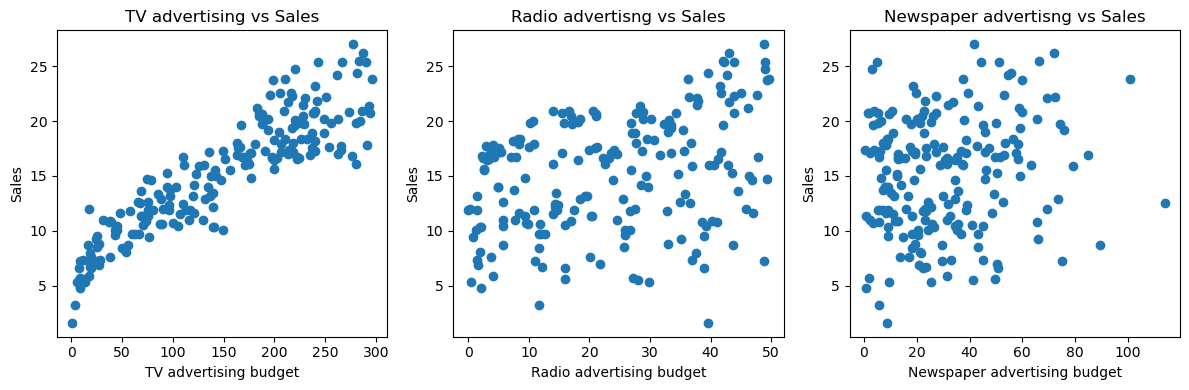

In [9]:
plt.figure(figsize=(12,4))

# Scatter plot for TV advertising budget vs. Sales
plt.subplot(131)
plt.scatter(df['TV'], df['Sales'])
plt.title('TV advertising vs Sales')
plt.xlabel('TV advertising budget')
plt.ylabel('Sales')

# Scatter plot for Radio advertising budget vs. Sales
plt.subplot(132)
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio advertisng vs Sales')
plt.xlabel('Radio advertising budget')
plt.ylabel('Sales')

# Scatter plot for Newspaper advertising budget vs. Sales
plt.subplot(133)
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper advertisng vs Sales')
plt.xlabel('Newspaper advertising budget')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

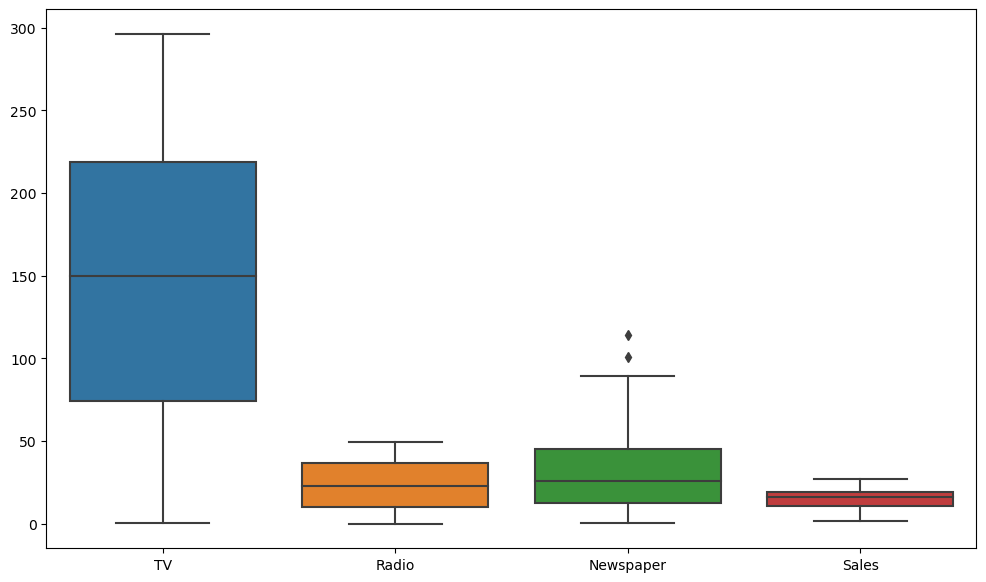

In [10]:
plt.figure(figsize=(12,7))
sns.boxplot(data = df)
plt.show()

In [11]:
from scipy.stats.mstats import winsorize
# handling outliers using winsorize method
column_to_winsorize = 'Newspaper'
df[column_to_winsorize] = winsorize(df[column_to_winsorize], limits=(0.05, 0.05))

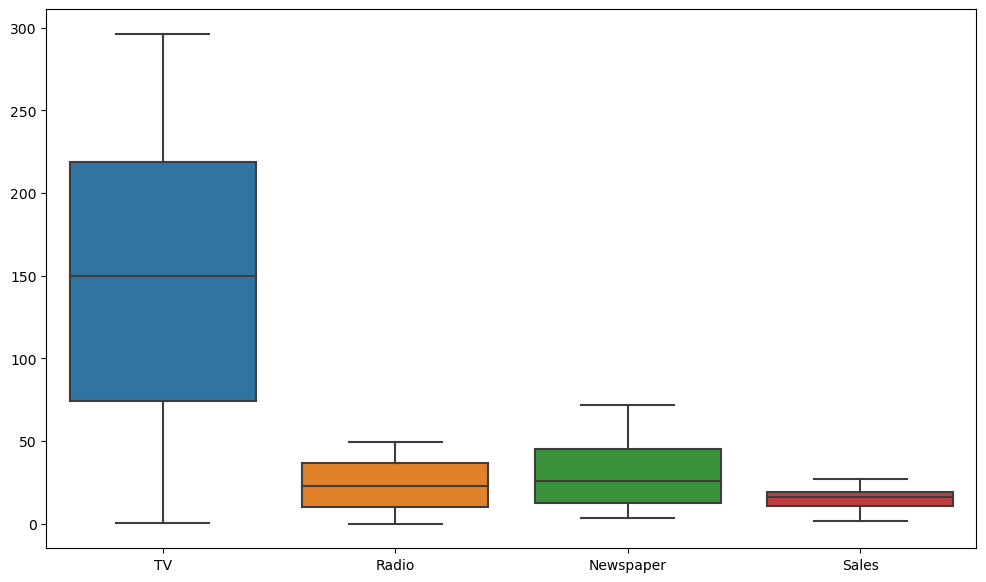

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(data = df)
plt.show()

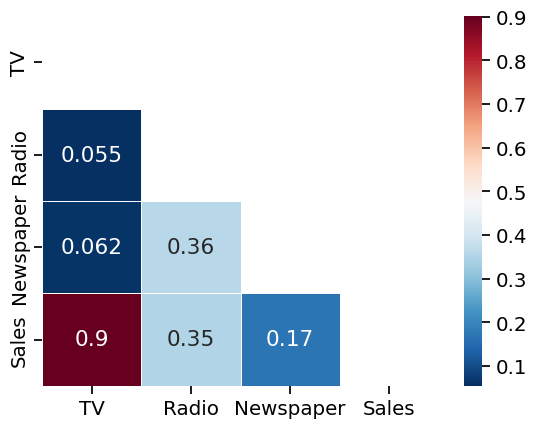

In [13]:
sns.set_context('notebook', font_scale=1.3)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', linewidths=0.5, mask=mask)
plt.show()

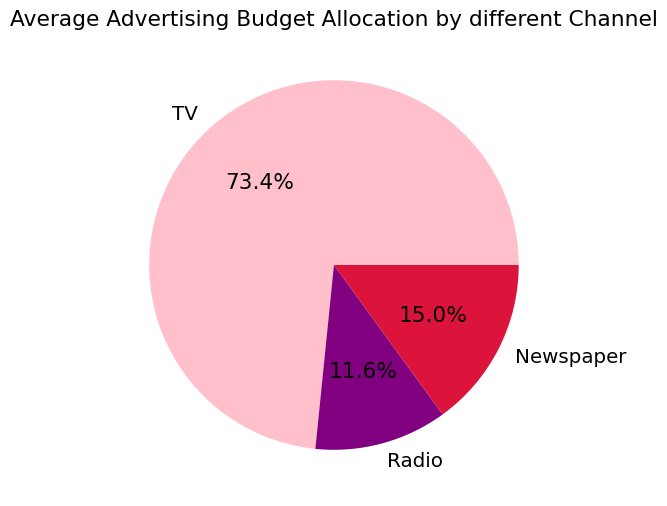

In [14]:
average_budget = df[['TV', 'Radio', 'Newspaper']].mean()
plt.figure(figsize=(8, 6))
plt.pie(average_budget, labels=average_budget.index, autopct='%1.1f%%', colors=['pink', 'purple', 'crimson'])
plt.title('Average Advertising Budget Allocation by different Channel')
plt.show()

In [15]:
# X is the feature variable
X = df.drop('Sales', axis=1)

In [16]:
# y is the target variable
y = df['Sales'] 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['TV', 'Radio', 'Newspaper', 'Sales']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.955484,1.322319
1,-1.197376,1.082808,0.752217,-0.897515
2,-1.516155,1.528463,1.960477,-0.593948
3,0.052050,1.217855,1.421253,0.259834
4,0.394182,-0.841614,1.416261,0.525455


In [19]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [20]:
pd.DataFrame({'Actual_y': y_test,'Predicted_y':y_pred_linear })

,Actual_y,Predicted_y
95,16.9,17.178669
15,22.4,20.549330
30,21.4,23.704319
158,7.3,9.525919
128,24.7,21.585656
115,12.6,12.796266
69,22.3,21.082230
170,8.4,8.752477
174,16.5,17.109436
45,16.1,16.691498


In [21]:
# Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred_linear,squared=False)
MSE

1.5911534438476902

In [22]:
# Calculate the Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
RMSE

1.2614093086098939

In [23]:
# Calculate the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred_linear)
MAE

1.1520881110874444

In [24]:
# Calculate the coefficient of determination (R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_linear)
print("R-squared:", r2)

R-squared: 0.909500697089185


<function matplotlib.pyplot.show(close=None, block=None)>

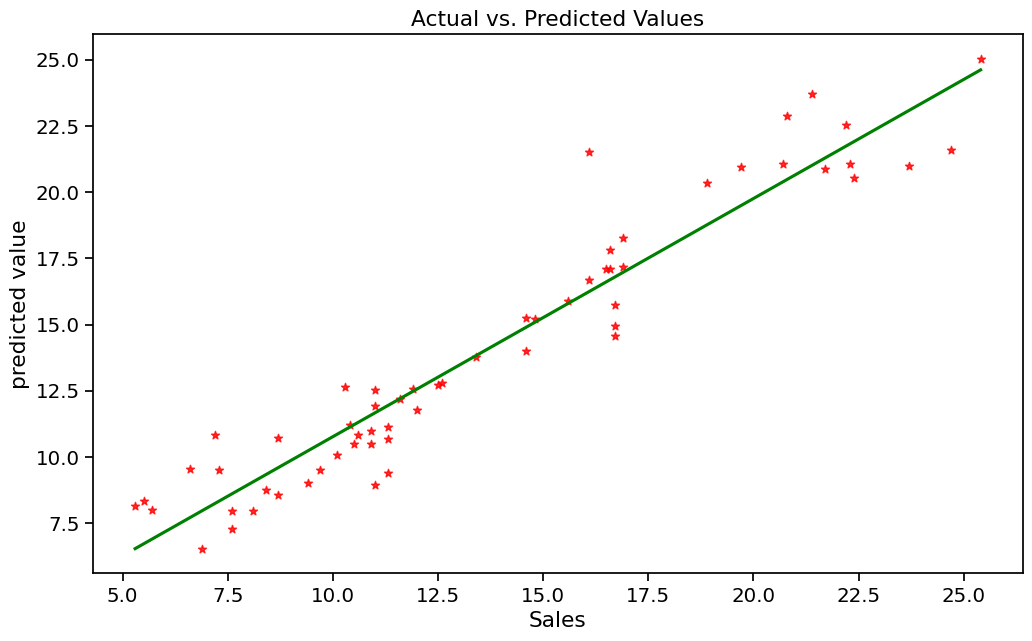

In [25]:
plt.figure(figsize=(12,7))
plt.xlabel("Actual value")
plt.ylabel("predicted value")
plt.title('Actual vs. Predicted Values')
sns.regplot(x=y_test, y=y_pred_linear, ci=None, color='red', marker="*",line_kws={"color": "green"})
plt.show

In [26]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

In [27]:
pd.DataFrame({'Actual_y': y_test,'Predicted_y':y_pred_ridge })

,Actual_y,Predicted_y
95,16.9,17.178657
15,22.4,20.549256
30,21.4,23.704309
158,7.3,9.525882
128,24.7,21.585537
115,12.6,12.796242
69,22.3,21.082149
170,8.4,8.752514
174,16.5,17.109498
45,16.1,16.691502


In [28]:
# Calculate the Mean Squared Error (MSE)
MSE_r = mean_squared_error(y_test, y_pred_ridge,squared=False)
MSE_r  

1.5911593716285648

In [29]:
# Calculate the Root Mean Squared Error (RMSE)
RMSE_r = np.sqrt(MSE_r)
RMSE_r

1.2614116582736046

In [30]:
# Calculate the Mean Absolute Error (MAE)
MAE_r = mean_absolute_error(y_test, y_pred_ridge)
MAE_r

1.1520910330631342

In [31]:
# Calculate the coefficient of determination (R-squared)
from sklearn.metrics import r2_score
r2_r = r2_score(y_test, y_pred_ridge)
print("R-squared:", r2_r)

R-squared: 0.9095000227845939
